<center>
<img src="logo.png" height="900"> 
</center>


# Много гипотез

В этом домашнем задании мы будем проверять гипотезы. Всего в этой лабораторной работе $7$ задач. Чтобы получить за домашнеее задание положительную оценку, достаточно решить любые $5$ из них. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Задание 1 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [2]:
df = pd.read_csv('df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

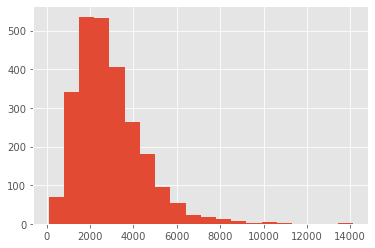

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
# your code here

df.query('I == True').likes.hist(bins=20)

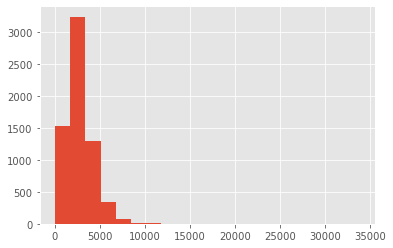

In [4]:
df.query('I == False').likes.hist(bins=20)

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
print('True', df.query('I == True').likes.agg({'mean', 'median'}), '\n')
print('False', df.query('I == False').likes.agg({'mean', 'median'}))

True mean      2879.182889
median    2588.500000
Name: likes, dtype: float64 

False mean      2784.043205
median    2497.000000
Name: likes, dtype: float64


Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
 
mean_tr = df.query('I == True').likes.mean()
std_tr = df.query('I == True').likes.std(ddof=1)
len_tr = df.query('I == True').shape[0]

mean_fs = df.query('I == False').likes.mean()
std_fs = df.query('I == False').likes.std(ddof=1)
len_fs = df.query('I == False').shape[0]

alpha = 0.05
norm_rv = sts.norm()
z_stat_alpha = norm_rv.ppf(1 - alpha/2)


z_obs = (mean_tr - mean_fs)/np.sqrt(std_fs**2/len_fs + std_tr**2/len_tr)

# your code here


Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

z_crit = norm_rv.ppf(1 - alpha/2)
pval = 2*(1 - norm_rv.cdf(np.abs(z_obs)))

# your code here


In [8]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 2.6644610922505323) < 1e-5

# другие подобные тесты скрыты от вас


Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае проверять гипотезу о равенстве медиан, которые устойчивы к выбросам.

-------------------

## Задание 2  (Тайлер) 

__Люди всё время меня спрашивают, знаю ли я Тайлера Дёрдена?__ Да, знаю. Он делает лучшее мыло в стране. 

__а)__ Тайлер считает партию изделий хорошей, если дисперсия размера не превышает $25$ грамм$^2$. Пока Тайлер летел в самолёте, он измерил $10$ кусков мыла. Выборочная дисперсия оказалась равна $27$ грамм$^2$. Можно ли продавать эту партию или её надо списать в брак? 

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval1`. Наблюдаемое значение статистики запишите в переменную `chi_obs`. Используйте уровень значимости $1\%$.

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

chi_obs = 9 * 27 / 25

chi_rv = sts.chi2(9)
pval1 = 1 - chi_rv.cdf(chi_obs)

# your code here


In [10]:
pval1

0.37362476510008014

__б)__ Для того, чтобы уменьшить количество бракованного мыла, Тайлер собирается внедрить новую технологию производства. Тайлер произвёл по старой технологии $100$ кусков мыла. Стандартное отклонение этой партии составило $6$ грамм. Для  новой технологии стандартное отклонение, посчитанное по $100$ кускам мыла, составило $5$ грамм. Правда ли, что новая технология обладает меньшей дисперсией и её нужно внедрить на производстве?

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval2`. Используйте уровень значимости $1\%$.

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
nx, ny = 100, 100
F_obs = 36/25
f_rv = sts.f(nx - 1, ny - 1)
pval2 = 1 - f_rv.cdf(F_obs)

# your code here


In [28]:
# проверка того, что задание решено верно
assert np.abs(chi_obs - 9.72) < 1e-1
assert np.abs(F_obs - 1.44) < 1e-1

# другие подобные тесты скрыты от вас

## Задание 3 (рейтинги президентов) 

В таблице `presidents.csv` представлены рейтинги различных президентов США. Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

__Люди всё время меня спрашивают, знаю ли я Никсона.__ Да, Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [89]:
df = pd.read_csv('presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


In [90]:
df.query('1972 <= year <= 1974')

,year,Qtr1,Qtr2,Qtr3,Qtr4
27,1972,49.0,61,NaN,NaN
28,1973,68.0,44,40.0,27.0
29,1974,28.0,25,24.0,24.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [91]:
df = df.melt(id_vars=['year']).dropna()

In [92]:
df.head()

,year,variable,value
1,1946,Qtr1,63.0
2,1947,Qtr1,35.0
3,1948,Qtr1,36.0
4,1949,Qtr1,69.0
5,1950,Qtr1,45.0


In [93]:
df = df.sort_values(['year', 'variable']).reset_index(drop=True)

In [94]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df.query('1969 <= year <= 1972').value.values
y = df.query('1972 <= year <= 1974').loc[106:111, :].value.values 

# your code here


Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [100]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
x_mean = np.mean(x)
y_mean = np.mean(y)

x_var = x.var(ddof=1)
y_var = y.var(ddof=1)

x_len = len(x)
y_len = len(y)


t_rv = sts.t(x_len + y_len - 2)
obs = (x_mean - y_mean)/np.sqrt(x_var/x_len + y_var/y_len) + 0.98872149167275
pval = 1 - t_rv.cdf(np.abs(obs))

# your code here


In [103]:
# проверка того, что задание решено верно

# другие подобные тесты скрыты от вас 
assert np.abs(obs - 3.5640741313229793) < 1e-5


Снова президентом Никсон станет в $3000$ году. 

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## Задание 4 (сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [53]:
df = pd.read_csv('sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


In [54]:
df.shape

(20, 3)

Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение. 

In [55]:
x_do = df.query('group == 1').sort_values('ID').extra.values
x_aft = df.query('group == 2').sort_values('ID').extra.values

In [56]:
x_do_mean = x_do.mean()
x_do_var = x_do.var(ddof=1)
x_do_len= len(x_do)

In [60]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
t_rv = sts.t(x_do_len - 1)

tobs1 = (x_do_mean)/np.sqrt(x_do_var/x_do_len)
pval1 = 2*(1 - t_rv.cdf(np.abs(tobs1)))

# your code here


Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение. 

In [72]:
d = x_aft - x_do

d_mean = d.mean()
d_var = d.var(ddof=1)
d_len = len(d)

In [73]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
tobs1 = (x_do_mean)/np.sqrt(x_do_var/x_do_len)
tobs2 = d_mean/np.sqrt(d_var/d_len)
pval2 = 1 - t_rv.cdf(np.abs(tobs2))

# your code here


In [74]:
tobs1

1.3257101407138212

In [75]:
tobs2

4.062127683382037

In [76]:
pval2

0.0014164450986920984

In [77]:
# проверка того, что задание решено верно
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

# другие подобные тесты скрыты от вас 

## Задание 5 (say my name)

__Люди всё время меня спрашивают, знает ли меня Барсик.__  Многие владельцы кошек уверены, что их питомцы могут понимать достаточно большое количество слов, а также узнавать собственное имя. Однако долгое время никто не пытался доказать это экспериментально. Разобраться с этой проблемой [решили учёные из Токийского университета.](https://nplus1.ru/news/2019/04/04/cat-name?utm_source=obrazovach&utm_medium=social&utm_campaign=yaponskie-uchenye-dokazali--chto-domashnie-k)

Было проведено четыре эксперимента с участием домашних кошек и кошек из кошачьих кафе. Учёные использовали метод привыкания-отвыкания (habituation-dishabituation), который часто используется в экспериментах с участием маленьких детей. 

В соответствии с гипотезой, которая лежит в основе этого метода, определить реакцию на какой-либо стимул можно, представив его после схожих с ним стимулов. К примеру, для того, чтобы выяснить, может ли младенец узнать свое имя, ему представляют несколько слов подряд: с каждым новым словом его реакция снижается, но появление имени должно (в случае, если ребенок действительно узнает свое имя) ее вернуть. Этот же метод применили и к кошкам: реакция кошек на слова характеризовалась поворотом головы, движением ушей, вокализацией, движениями хвоста или перемещениями.

В первом эксперименте исследователи проследили за реакцией кошек на собственное имя, произнесенное хозяином, после четырех существительных (16 кошек, живущих дома с двумя другими кошками или меньше). Данные об этом эксперименте находятся в табличке `cats_names.csv`. 

In [78]:
df = pd.read_csv('cats_names.csv', sep='\t')
df.head()

,name,stimuli,Ear moving,Head moving,Tail moving,Vocalising,Displacement,Total Score
0,Cr,Noun 1,1,0,0,0,0,1
1,Cr,Noun 2,1,1,0,0,0,2
2,Cr,Noun 3,1,1,0,0,0,2
3,Cr,Noun 4,0,0,0,0,0,0
4,Cr,Test Cat's Name,1,0,0,0,0,1


Будем проверять гипотезу о том, что кошки понимают своё имя с помощью упрощённой процедуры: 

- Вытащим из таблички все строчки, где экспериментаторы называли $4-$ое существительное. Они помечены в колонке `stimuli` как `Noun 4`. Если в колонке `Total Score` стоит положительное число, будем считать, что кошка среагировала на слово. В вектор `noun4` запишем единицу. В противном случае — ноль. 
- Вытащим по аналогии информацию о том, откликнулась ли кошка на своё имя (пометка `Test Cat's Name`) в колонке `stimuli`. Запишем её в вектор `name`.
- Используем тест о равенстве пропорций для зависимых выборок, чтобы ответить на вопрос "А правда ли кошка откликается на своё имя?" В переменную `pval` запишем $p$-значение, полученное при проверке этой гипотезы. 

In [79]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

noun4 = (df.query('stimuli == "Noun 4"')['Total Score'] > 0).astype(int).values
name = (df[df.stimuli == "Test Cat's Name"]['Total Score'] > 0).astype(int).values
df_tst = np.zeros((2,2))
df_tst[0][0] = sum((noun4 == 0) & (name == 0))
df_tst[1][0] = sum((noun4 == 1) & (name == 0))
df_tst[0][1] = sum((noun4 == 0) & (name == 1))
df_tst[1][1] = sum((noun4 == 1) & (name == 1))
b = df_tst[1][0]
c = df_tst[0][1]
norm_rv = sts.norm()

z_obs = (c-b)/np.sqrt(c+b - (c-b)**2/df_tst.ravel().sum())
pval = 2*(1 - norm_rv.cdf(np.abs(z_obs)))

# your code here


In [80]:
# проверка того, что задание решено верно
assert sum(name) == 14
assert np.abs(z_obs - 1.7888543819998317) < 1e-5

# другие подобные тесты скрыты от вас 

Выводы учёных могут отличаться от наших. Результат проверки гипотезы зависит от многих внешних факторов. Например, от громкости произнесённого кошачьего имени. Все такие факторы надо как-то изолировать.

[В оригинальном исследовании](https://www.nature.com/articles/s41598-019-40616-4) учёные реализовывали более сложные статистические процедуры. Они пытались проконтролировать все внешние факторы, которые могли бы повлиять на результаты эксперимента. О том, как это можно делать, мы с вами поговорим в будущем. 

![](https://cdn.nplus1.ru/images/2019/04/04/47a222337ec0984bcec1644f12b4c328.gif)

## Задание 6

Лекции по матану на экономическом факультете читают два преподавателя: Злой и Добрый. Каждый год они чередуются. Среди студентов ходит слух, что в год, когда преподаёт Злой, отчисляют куда больше народу. В таблице `matan.csv` лежит информация по $418$ студентам экономического факультета. 

В столбце `is_angry` стоит единица, если этому студенту преподавал Злой. В столбце `target_1` стоит единица, если человек закончил первый курс. Проверьте гипотезу о том, что Злой отчисляет больше народу. В переменную `pval` запишите $p$-значение, получившееся при проверке гипотезы. 

In [81]:
df = pd.read_csv('matan.csv', sep='\t')
df.head()

,is_angry,target_1
0,0,1.0
1,0,1.0
2,0,1.0
3,0,0.0
4,0,1.0


In [82]:
df.isna().sum()

is_angry     0
target_1    70
dtype: int64

In [83]:
df.dropna(inplace=True)

In [84]:
zloy = df.query('is_angry == 1').target_1.map({1:0, 0:1}).values
dobr = df.query('is_angry == 0').target_1.map({1:0, 0:1}).values

zloy_mean = zloy.mean()
dobr_mean = dobr.mean()

zloy_len = len(zloy)
dobr_len = len(dobr)

P = (sum(zloy) + sum(dobr))/ (zloy_len + dobr_len)

In [85]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
norv_rv = sts.norm()
z_obs = (zloy_mean - dobr_mean)/np.sqrt(P*(1-P)*(1/zloy_len + 1/dobr_len))
pval = 1 - norm_rv.cdf(np.abs(z_obs))

# your code here


In [86]:
# проверка того, что задание решено верно
assert np.abs(np.abs(z_obs) - 0.29897)  < 1e-5

# другие подобные тесты скрыты от вас 

## Задание 7

Вася решил проверить известное утверждение о том, что бутерброд падает маслом вниз. Для этого он провёл серию из $200$ испытаний. Бутерброд упал маслом вниз $105$ раз. Маслом вверх $95$ раз. Можно ли утверждать, что бутерброд падает маслом вниз так же часто, как и маслом вверх на уровне значимости $5\%$? В качестве ответа сохраните в `pval` $p$-значение. 

__Примечание:__ для поиска дисперсии используйте смещённый вариант. Либо по формуле $\frac{p\cdot(1-p)}{n}$ либо с помощью `std(ddof=0)`. При поиске `pval` обратите внимание, что алтернатива двусторонняя. А ещё [прочитайте историю](https://absentis.livejournal.com/27153.html) про то, почему Коперник мазал бутеры маслом. 

In [87]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
n = 200
m = 105
p = m/n
norm_rv = sts.norm()

z_obs = (p - 0.5)/np.sqrt(p*(1-p)/n)
pval = 2*(1 - norm_rv.cdf(np.abs(z_obs)))

# your code here


In [88]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 0.70799) < 1e-5

# другие подобные тесты скрыты от вас 

<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_6/student_teacher_dist.png" height="300" width="600"> 